# Day 3

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print(platform.platform())

Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.35


## 회귀 분석

목표값이 연속적인 숫자 $y \in \mathbb{R}$ 경우, 회귀 분석의 대상입니다.

(100,) (100, 1)
   target     예측    오차
0   -7.96  -9.83  1.87
1  -12.35  -9.83 -2.52
2   -9.18 -10.50  1.32
3   -9.96  -9.59 -0.37
4   -9.64  -9.60 -0.04
scores
           MAE    R2
best      0.00  1.00
model     0.73  0.97
baseline  5.04  0.00
reverse    NaN -3.00


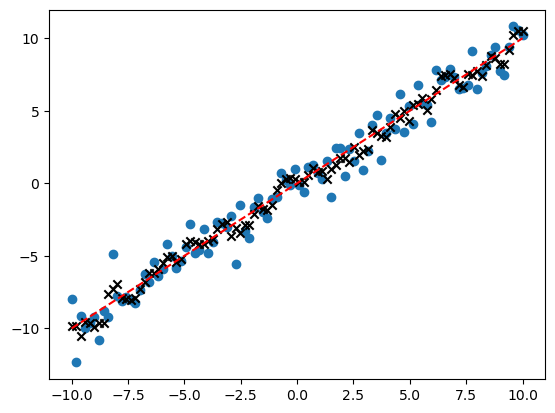

In [19]:
from sklearn.neighbors import KNeighborsRegressor

random = np.random.default_rng(3)

xs = np.linspace(-10, 10, 100)
평균, 편차 = 0, 1
noise = random.normal(평균, 편차, xs.shape)
ys = xs + noise

data = xs.reshape(-1, 1) # (S,) -> (S, 1)
print(xs.shape, data.shape)
target = ys
model = KNeighborsRegressor(n_neighbors=3)
model.fit(data, target)

예측 = model.predict(data)

print(pd.DataFrame({
    'target': target,
    '예측': 예측,
    '오차': target - 예측
}).head(5).round(2))

# 전체 표본에 대한 오차 평균
def r2_score(y_true, y_pred):
    오차 = y_true - y_pred
    편차 = y_true - np.mean(y_true)
    return 1 - (np.sum(오차**2) / np.sum(편차**2))

error = target - 예측
정답평균 = np.mean(target)
scores = {}
scores['MAE'] = {
    'best': np.mean(np.abs(target - target)),
    'model': np.mean(np.abs(error)),
    'baseline': np.mean(np.abs(target - 정답평균))
}
scores['R2'] = {
    'best': r2_score(target, target),
    'model': r2_score(target, 예측),
    'baseline': r2_score(target, 정답평균),
    'reverse': r2_score(target, -target)
}
print('scores')
print(pd.DataFrame(scores).round(2))

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, color="red", linestyle='--')
plt.scatter(xs, model.predict(data), color="black", marker='x')
plt.show()

## 캘리포니아 주택 가격

In [28]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.target[:5].round(2)) # 회귀 출력
housing.frame.sample(5, random_state=3).round(2)

0    4.53
1    3.58
2    3.52
3    3.41
4    3.42
Name: MedHouseVal, dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9491,3.59,22.0,5.41,1.02,821.0,2.88,39.21,-123.19,1.19
11843,2.96,15.0,5.27,1.11,816.0,2.58,39.96,-120.93,1.19
11271,3.29,21.0,3.95,1.04,1888.0,2.76,33.79,-117.99,2.13
19219,3.06,19.0,4.27,0.99,1130.0,2.61,38.47,-122.67,1.90
14356,3.35,11.0,3.90,1.13,1960.0,1.77,32.75,-117.23,1.60


In [29]:
housing.frame.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [23]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline

train_data, test_data, train_target, test_target = train_test_split(
    housing.data, housing.target, random_state=3, test_size=0.25)

print(train_data.shape, test_data.shape)

scores = {}
for scaler in [MinMaxScaler(), StandardScaler(), RobustScaler()]:
    model = make_pipeline(scaler, KNeighborsRegressor(n_neighbors=5, p=2))
    scaler_name = model.steps[0][0]
    print(scaler_name)
    for p in [1, 2]: # 1=맨해튼, 2=유클리드
        model.set_params(kneighborsregressor__p=p)
        for 이웃수 in range(1, 10, 2):
            model.set_params(kneighborsregressor__n_neighbors=이웃수)
            model.fit(train_data, train_target)
            scores[(scaler_name, p, 이웃수)] = {
                'train': model.score(train_data, train_target),
                'test': model.score(test_data, test_target)
            }

(15480, 8) (5160, 8)
minmaxscaler
standardscaler
robustscaler


minmaxscaler                                                       ...  \
                 1                             2                         ...   
                 1     3     5     7     9     1     3    5     7     9  ...   
train         1.00  0.86  0.82  0.80  0.79  1.00  0.84  0.8  0.79  0.77  ...   
test          0.57  0.70  0.72  0.73  0.73  0.55  0.67  0.7  0.70  0.70  ...   

      robustscaler                                                        
                 1                             2                          
                 1     3     5     7     9     1     3     5     7     9  
train         1.00  0.84  0.81  0.79  0.78  1.00  0.83  0.79  0.77  0.76  
test          0.53  0.68  0.70  0.71  0.72  0.49  0.65  0.69  0.70  0.70  

[2 rows x 30 columns]

In [57]:
pd.DataFrame(scores).T.round(2)

train  test
minmaxscaler   1 1   1.00  0.57
                 3   0.86  0.70
                 5   0.82  0.72
                 7   0.80  0.73
                 9   0.79  0.73
               2 1   1.00  0.55
                 3   0.84  0.67
                 5   0.80  0.70
                 7   0.79  0.70
                 9   0.77  0.70
standardscaler 1 1   1.00  0.56
                 3   0.85  0.69
                 5   0.81  0.71
                 7   0.79  0.72
                 9   0.78  0.72
               2 1   1.00  0.51
                 3   0.83  0.65
                 5   0.79  0.67
                 7   0.77  0.69
                 9   0.76  0.69
robustscaler   1 1   1.00  0.53
                 3   0.84  0.68
                 5   0.81  0.70
                 7   0.79  0.71
                 9   0.78  0.72
               2 1   1.00  0.49
                 3   0.83  0.65
                 5   0.79  0.69
                 7   0.77  0.70
                 9   0.76  0.70

## 선형모형

In [64]:
from sklearn.model_selection import train_test_split

def 모델평가(model, data, target, **설정):
    train_data, test_data, train_target, test_target = train_test_split(data, target, **설정)
    model.fit(train_data, train_target)
    scores = {
        'train': model.score(train_data, train_target),
        'test': model.score(test_data, test_target)
    }
    return scores

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

난수초기값 = 3
scores = {}

knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=9, p=1))
scores['kNN'] = 모델평가(knn, housing.data, housing.target, random_state=난수초기값)

linreg = LinearRegression()
scores['선형회귀'] = 모델평가(linreg, housing.data, housing.target, random_state=난수초기값)

pd.DataFrame(scores).round(2)

,kNN,선형회귀
train,0.79,0.61
test,0.73,0.59


선형 모형의 가장 기본적인 형태는 직선

$$
y = w x + b
$$

y = 1.00x + -0.06
0   -3.65
1    0.97
2    0.97
dtype: float64


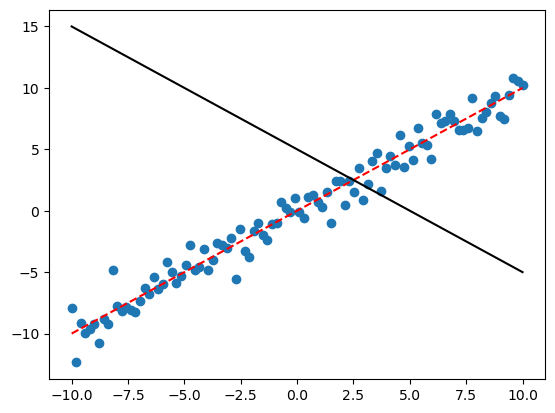

In [93]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

random = np.random.default_rng(3)
xs = np.linspace(-10, 10, 100)
noise = random.normal(0, 1, xs.shape)
ys = xs + noise

# 선형 모델
f = lambda x, w, b: w * x + b
params = [(-1.0, 5.0)] # 초기값
params.append((1.0, 0.0)) # DGP 기준값

linreg = LinearRegression()
data = xs.reshape(-1, 1); target = ys
linreg.fit(data, target)
# 방정식으로 최적해 계산
X = np.stack([np.ones(xs.shape), xs], axis=1) # 디자인 행렬
b, w = np.linalg.inv(X.T @ X) @ X.T @ ys # (X.T @ X)^-1 @ X.T @ y
assert np.isclose(w, linreg.coef_[0]) and np.isclose(b, linreg.intercept_)

w = linreg.coef_[0]; b = linreg.intercept_
print(f'y = {w:.2f}x + {b:.2f}')
params.append((w, b))

예측 = [f(xs, *w_and_b) for w_and_b in params]

scores = [r2_score(ys, y_pred) for y_pred in 예측]
print(pd.Series(scores).round(2))

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, color="red", linestyle='--')
plt.plot(xs, 예측[0], color="black", linestyle='-')
plt.show()

### 다차원 선형 모형

다차원 입력 $\mathbf{x} = \left( x_1, x_2, \dots, x_k, \dots, x_n \right)$ 에 대한 선형 모형은 입력에 일대일로 가중치(기울기)가 대응

$$
\mathbf{w} = \left(w_1, w_2, \dots, w_k, \dots, w_n \right) \in \mathbb{R}^{n},
\quad
b \in \mathbb{R}
$$

선형 모형

$$
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_k x_k + \dots + w_n x_n + b
$$

In [ ]:
model = LinearRegression()
scores = 모델평가(model, housing.data, housing.target, random_state=3)
print(pd.Series(scores).round(2))
# 선형 모형
print(f'y = {b:.2f} + ' + ' + '.join([f'{w:.2f}x{k+1}' for k, w in enumerate(model.coef_)])) 
# 학습된 매개변수 확인: 특성과 일대일 대응
pd.Series(model.coef_, index=housing.feature_names).round(2)

train    0.61
test     0.59
dtype: float64
y = -0.06 + 0.45x1 + 0.01x2 + -0.13x3 + 0.82x4 + -0.00x5 + -0.00x6 + -0.42x7 + -0.44x8


MedInc        0.45
HouseAge      0.01
AveRooms     -0.13
AveBedrms     0.82
Population   -0.00
AveOccup     -0.00
Latitude     -0.42
Longitude    -0.44
dtype: float64

### 다항식 차원 확장

(100, 2)
R2: 1.00


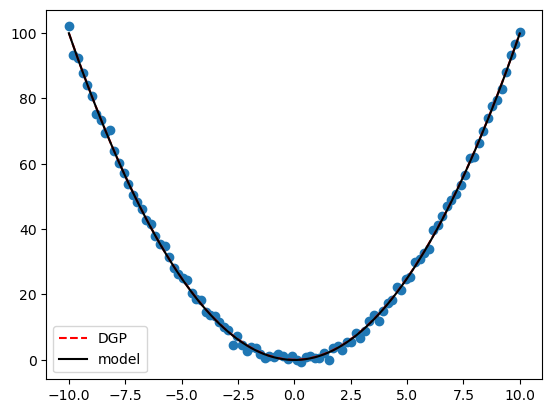

In [104]:
random = np.random.default_rng(3)
xs = np.linspace(-10, 10, 100)
noise = random.normal(0, 1, xs.shape)
ys = xs ** 2 + noise

model = LinearRegression()
data = xs.reshape(-1, 1); target = ys
data = np.hstack([data, data ** 2])
print(data.shape)
model.fit(data, target)
예측 = model.predict(data)
print(f'R2: {model.score(data, target):.2f}')

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, 'r--', label='DGP')
plt.plot(xs, 예측, 'k', label='model')
plt.legend()
plt.show()

In [107]:
model = LinearRegression()
scores = {}
scores['before'] = 모델평가(model, housing.data, housing.target, random_state=3)
X2 = np.hstack([housing.data, housing.data ** 2])
print(housing.data.shape, X2.shape)
scores['X2'] = 모델평가(model, X2, housing.target, random_state=3)
print(pd.DataFrame(scores).round(2))
# 선형 모형
print(f'y = {b:.2f} + ' + ' + '.join([f'{w:.2f}x^{k+1}' for k, w in enumerate(model.coef_)])) 

(20640, 8) (20640, 16)
       before    X2
train    0.61  0.62
test     0.59  0.45
y = -0.06 + 0.62x^1 + -0.00x^2 + -0.21x^3 + 1.44x^4 + -0.00x^5 + -0.01x^6 + -1.76x^7 + -4.23x^8 + -0.01x^9 + 0.00x^10 + 0.00x^11 + -0.09x^12 + 0.00x^13 + 0.00x^14 + 0.02x^15 + -0.02x^16


## 비지도 학습

In [108]:
housing.frame.sample(5).round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
10786,4.91,30.0,5.03,1.00,1081.0,2.62,33.63,-117.91,3.36
13465,2.35,12.0,4.87,1.27,1054.0,2.71,34.13,-117.37,1.41
13566,1.98,26.0,4.93,1.06,1068.0,2.13,34.16,-117.28,1.22
1145,2.89,22.0,7.23,1.56,986.0,2.52,39.61,-121.39,0.95
2656,1.94,32.0,7.65,2.24,434.0,2.32,40.28,-124.25,0.76


In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=3)
kmeans.fit(housing.data) # 비지도 학습: 목표값이 없고, 데이터만 있음
군집 = kmeans.predict(housing.data)

pd.Series(군집).value_counts(normalize=True).round(2)

0    0.89
1    0.11
Name: proportion, dtype: float64

In [116]:
군집별 = housing.frame.groupby(군집)
군집별.mean().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.87,29.79,5.46,1.10,1129.77,2.90,35.69,-119.62,2.07
1,3.90,19.73,5.19,1.07,3707.24,4.38,35.20,-119.16,2.02


In [125]:
관심특성목록 = ['Population', 'AveOccup']
print('전체 평균')
print(housing.frame[관심특성목록].mean().round(2))
housing.frame[군집 == 1].sort_values(by=관심특성목록[::-1], ascending=False).round(2).head(10)

전체 평균
Population    1425.48
AveOccup         3.07
dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.23,45.0,3.17,0.83,7460.0,1243.33,38.32,-121.98,1.38
3364,5.52,36.0,5.14,1.14,4198.0,599.71,40.41,-120.51,0.68
16669,4.26,46.0,9.08,1.31,6532.0,502.46,35.32,-120.70,3.50
13034,6.14,52.0,8.28,1.52,6675.0,230.17,38.69,-121.15,2.25
9172,4.24,5.0,5.12,0.93,8733.0,83.17,34.47,-118.59,1.55
13366,4.26,36.0,5.26,1.12,2886.0,33.95,33.94,-117.63,1.83
5986,1.88,52.0,4.50,1.21,2688.0,21.33,34.10,-117.71,2.12
14756,2.56,23.0,4.59,1.07,5176.0,18.82,32.56,-116.97,1.53
1039,4.30,16.0,6.09,1.12,4930.0,17.18,38.42,-120.97,1.22
7164,2.18,36.0,4.81,1.11,2862.0,15.81,34.06,-118.17,1.24


극단적인 이상치들은 모형에 방해가 되니 제거 권장

In [132]:
특성별_정상필터 = {}

for 특성명 in housing.data.columns:
    특성열 = housing.data[특성명]
    Q1, Q3 = np.percentile(특성열, [25, 75])
    IQR = Q3 - Q1
    이상치하한 = Q1 - 1.5 * IQR
    이상치상한 = Q3 + 1.5 * IQR
    # print(f'정상 범위: {이상치하한:.2f} ~ {이상치상한:.2f}')
    특성별_정상필터[특성명] = 특성열.between(이상치하한, 이상치상한)

# 정상 필터의 교집합(논리곱)
정상필터 = np.logical_and.reduce(list(특성별_정상필터.values()))
print(f'전체 관측치 수: {len(정상필터):,}, 정상 범위: {np.sum(정상필터):,}')

전체 관측치 수: 20,640, 정상 범위: 16,842
